<a href="https://colab.research.google.com/github/nikhil5589/price-predictor/blob/main/IPL_DATASET_BALL_TO_BALL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [ ]:
data = pd.read_csv ('/content/deliveries.csv')
data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
data.shape

(179078, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
data.isnull().sum()/len(data)*100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

In [ ]:
data.drop(columns = ['player_dismissed', 'dismissal_kind','fielder'], inplace = True)

In [ ]:
data.shape

(179078, 18)

In [ ]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [ ]:
# FINDING THE TOP RUNS SCORER OF OVERALL IPL

In [ ]:
data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

<Axes: xlabel='batsman'>

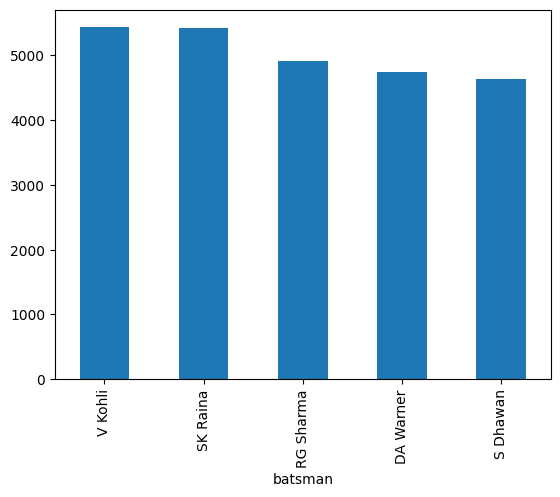

In [ ]:
data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')

In [ ]:
warner = data[data['batsman'] == 'DA Warner']
warner.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head()

batsman
DA Warner    4741
Name: batsman_runs, dtype: int64

In [ ]:
# Creating the User Defined Function for FINDING THE TOP RUNS SCORER

In [ ]:
def batsman_overall_runs(batsman):
    runs = data[data['batsman'] == batsman]
    return runs.groupby('batsman')['batsman_runs'].sum().sort_values()

In [ ]:
batsman_overall_runs('AT Rayudu')

batsman
AT Rayudu    3326
Name: batsman_runs, dtype: int64

In [ ]:
# FINDING BATSMEN WITH MOST NUMBER OF SIXES


In [ ]:
sixes = data[data['batsman_runs'] == 6]
sixes.groupby('batsman')['batsman'].count().sort_values(ascending=False).head(10)

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman, dtype: int64

<Axes: xlabel='batsman'>

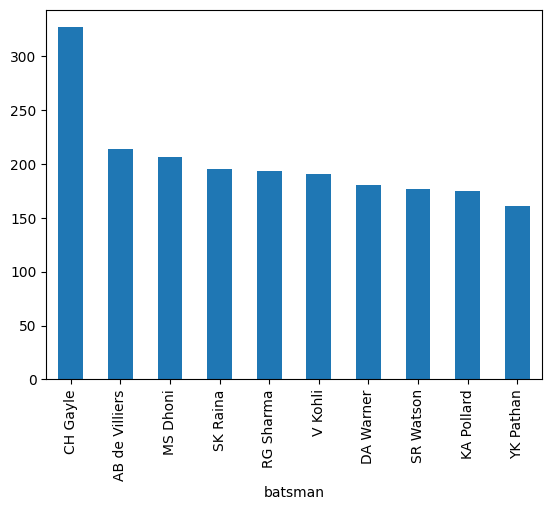

In [ ]:
sixes.groupby('batsman')['batsman'].count().sort_values(ascending=False).head(10).plot(kind = 'bar')

HERE WE CAN SEE THAT CHRIS GAYLE WITH MOST NUMBER OF SIXES"

In [ ]:
# FINDING BATSMEN WITH MOST NUMBER OF FOURS

In [ ]:
fours = data[data['batsman_runs'] == 4]
fours.groupby('batsman')['batsman'].count().sort_values(ascending=False)

batsman
S Dhawan          526
SK Raina          495
G Gambhir         492
V Kohli           482
DA Warner         459
                 ... 
Sandeep Sharma      1
S Mavi              1
Shivam Sharma       1
NS Naik             1
J Theron            1
Name: batsman, Length: 410, dtype: int64

<Axes: title={'center': 'MOST FOURS BY AN BATSMEN IN IPL'}, ylabel='batsman'>

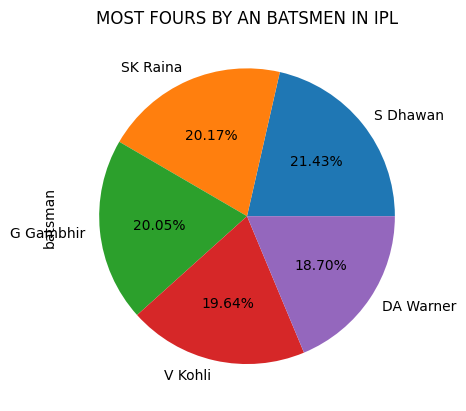

In [ ]:
fours.groupby('batsman')['batsman'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%2.2f%%',title='MOST FOURS BY AN BATSMEN IN IPL')


HERE WE CAN SEE THAT SHIKHAR DHAWAN WITH MOST NUMBER OF FOURS

In [ ]:
# FINDING THE BATSMAN OVERALL RUNS WITH ALL TEAMS

In [ ]:
runs_by_team = data[data['batsman'] == 'MEK Hussey']
runs_by_team.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending = False)

bowling_team
Rajasthan Royals               350
Kolkata Knight Riders          281
Royal Challengers Bangalore    281
Mumbai Indians                 258
Kings XI Punjab                251
Delhi Daredevils               235
Sunrisers Hyderabad            112
Pune Warriors                   75
Deccan Chargers                 54
Chennai Super Kings             40
Kochi Tuskers Kerala            40
Name: batsman_runs, dtype: int64

In [ ]:
# Creating the User Defined Function for finding individual player runs over all teams

In [ ]:
def runs_over_teams(batsman):
    runs_by_team = data[data['batsman'] == batsman]
    return runs_by_team.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending = False)

In [ ]:
runs_over_teams('AB de Villiers')

bowling_team
Kings XI Punjab                685
Mumbai Indians                 660
Rajasthan Royals               582
Chennai Super Kings            479
Delhi Daredevils               411
Sunrisers Hyderabad            392
Kolkata Knight Riders          364
Gujarat Lions                  233
Deccan Chargers                153
Pune Warriors                  149
Royal Challengers Bangalore    115
Rising Pune Supergiants         84
Kochi Tuskers Kerala            54
Delhi Capitals                  35
Rising Pune Supergiant          32
Name: batsman_runs, dtype: int64

In [ ]:
data.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
2874,13,1,Rising Pune Supergiant,Gujarat Lions,7,5,SPD Smith,BA Stokes,RA Jadeja,0,0,0,0,0,0,4,0,4


In [ ]:
# FINDING THE PLAYER WITH MOST NUMBER OF RUNS DURING POWERPLAY

In [ ]:
power_play = data[data['over'] < 7]
power_play.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(5)

batsman
S Dhawan     2411
DA Warner    2326
G Gambhir    2283
CH Gayle     2278
PA Patel     1924
Name: batsman_runs, dtype: int64

<Axes: xlabel='batsman in powerplay'>

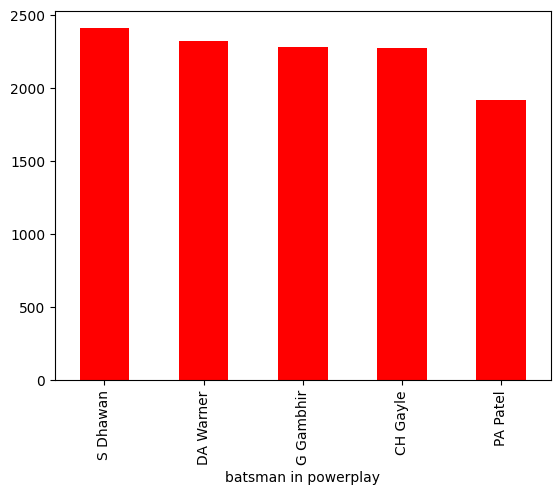

In [ ]:
power_play.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(5).plot(kind  = 'bar', color= 'red',xlabel='batsman in powerplay')

So, This are the players with most runs during the power play

In [ ]:
# FINDING THE PLAYER WITH MOST NUMBER OF RUNS at Last 5 Overs

In [ ]:
last_overs = data[data['over'] > 15 ]
last_overs.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(5)

batsman
MS Dhoni          2669
KA Pollard        1562
RG Sharma         1450
AB de Villiers    1412
V Kohli           1154
Name: batsman_runs, dtype: int64

<Axes: xlabel='MOST RUNS BY BATSMEN IN LAST 5 OVERS'>

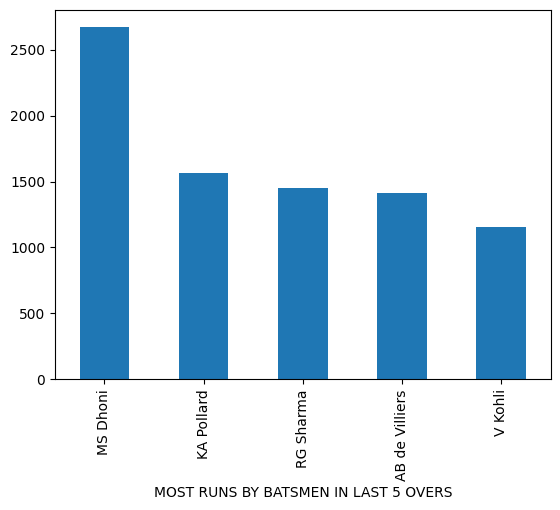

In [ ]:
last_overs.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar',xlabel='MOST RUNS BY BATSMEN IN LAST 5 OVERS')

So, This are the players with most runs during the last 5 overs:

In [ ]:
data.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
110265,465,2,Delhi Daredevils,Chennai Super Kings,8,6,KD Karthik,JP Duminy,MM Sharma,0,0,0,0,0,0,0,0,0


**BOWLER CONCEDING THE MOST RUNS WITH THE TEAM**

In [ ]:
bowler_data = data[data['bowler'] == 'B Kumar']
bowler_data.groupby('batting_team')['batsman_runs'].sum().sort_values(ascending=False)

batting_team
Kolkata Knight Riders          530
Royal Challengers Bangalore    432
Kings XI Punjab                372
Delhi Daredevils               351
Rajasthan Royals               335
Chennai Super Kings            321
Mumbai Indians                 267
Gujarat Lions                  125
Delhi Capitals                 103
Deccan Chargers                 90
Rising Pune Supergiant          75
Rising Pune Supergiants         33
Sunrisers Hyderabad             33
Name: batsman_runs, dtype: int64

In [ ]:
# Creating the User Defined Function for bowlers conceding runs with opposite teams

In [ ]:
def bowler_conceding_runs(bowler):
  bowler_data = data[data['bowler'] == bowler]
  return bowler_data.groupby('batting_team')['batsman_runs'].sum().sort_values(ascending=False)

In [ ]:
bowler_conceding_runs('DW Steyn')

batting_team
Kolkata Knight Riders          391
Chennai Super Kings            330
Mumbai Indians                 309
Kings XI Punjab                278
Delhi Daredevils               268
Rajasthan Royals               219
Royal Challengers Bangalore    200
Pune Warriors                  141
Deccan Chargers                117
Sunrisers Hyderabad             16
Kochi Tuskers Kerala            14
Name: batsman_runs, dtype: int64

In [ ]:
data.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
30210,130,2,Rajasthan Royals,Kings XI Punjab,9,2,RA Jadeja,AS Raut,PP Chawla,0,0,0,0,0,0,1,0,1


TOTAL NUMBER OF SIXES BY EACH TEAM

In [ ]:
def total_sixes_by_team(batting_team):
    sixes = data[(data['batting_team'] == batting_team) & (data['batsman_runs'] == 6)]
    return sixes['batsman_runs'].value_counts()

In [ ]:
print(total_sixes_by_team('Royal Challengers Bangalore'))
print(total_sixes_by_team('Chennai Super Kings'))
print(total_sixes_by_team('Kolkata Knight Riders'))
print(total_sixes_by_team('Delhi Daredevils'))
print(total_sixes_by_team('Kings XI Punjab'))
print(total_sixes_by_team('Mumbai Indians'))
print(total_sixes_by_team('Rising Pune Supergiant'))
print(total_sixes_by_team('Sunrisers Hyderabad'))
print(total_sixes_by_team('Kochi Tuskers Kerala'))

6    1132
Name: batsman_runs, dtype: int64
6    973
Name: batsman_runs, dtype: int64
6    930
Name: batsman_runs, dtype: int64
6    801
Name: batsman_runs, dtype: int64
6    976
Name: batsman_runs, dtype: int64
6    1096
Name: batsman_runs, dtype: int64
6    89
Name: batsman_runs, dtype: int64
6    533
Name: batsman_runs, dtype: int64
6    53
Name: batsman_runs, dtype: int64


**TOTAL NUMBER OF FOURS BY EACH TEAM**

In [ ]:
def total_fours_by_team(batting_team):
    fours = data[(data['batting_team'] == batting_team) & (data['batsman_runs'] == 4)]
    return fours['batsman_runs'].value_counts()

In [ ]:
print(total_fours_by_team('Royal Challengers Bangalore'))
print(total_fours_by_team('Chennai Super Kings'))
print(total_fours_by_team('Kolkata Knight Riders'))
print(total_fours_by_team('Delhi Daredevils'))
print(total_fours_by_team('Kings XI Punjab'))
print(total_fours_by_team('Mumbai Indians'))
print(total_fours_by_team('Rising Pune Supergiant'))
print(total_fours_by_team('Sunrisers Hyderabad'))
print(total_fours_by_team('Kochi Tuskers Kerala'))

4    2360
Name: batsman_runs, dtype: int64
4    2193
Name: batsman_runs, dtype: int64
4    2434
Name: batsman_runs, dtype: int64
4    2158
Name: batsman_runs, dtype: int64
4    2458
Name: batsman_runs, dtype: int64
4    2588
Name: batsman_runs, dtype: int64
4    197
Name: batsman_runs, dtype: int64
4    1444
Name: batsman_runs, dtype: int64
4    170
Name: batsman_runs, dtype: int64


In [ ]:
data.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
178740,11414,2,Chennai Super Kings,Delhi Capitals,5,3,F du Plessis,SR Watson,AR Patel,0,0,0,0,0,0,6,0,6


In [ ]:
#FINDING ALL OVER TOTAL SIXES 6'S IN IPL

In [ ]:
sixes = data[data['batsman_runs'] == 6]
sixes['batsman_runs'].value_counts()

6    8170
Name: batsman_runs, dtype: int64

In [ ]:
#FINDING ALL OVER TOTAL FOURS 4'S IN IPL

In [ ]:
fours = data[data['batsman_runs'] == 4]
fours['batsman_runs'].value_counts()

4    20392
Name: batsman_runs, dtype: int64

In [ ]:
data.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
73103,311,1,Rajasthan Royals,Kings XI Punjab,3,4,AM Rahane,R Dravid,P Kumar,0,0,0,0,0,0,4,0,4


In [ ]:
#CREATING THE FUNCTION FOR NO OF 4'S OF A PLAYER IN AN OVERALL IPL

In [ ]:
result = data[(data['batsman'] == 'MS Dhoni') & (data['batsman_runs'] == 4)].groupby('batsman')['batsman_runs'].sum()

In [ ]:
print(result)

batsman
MS Dhoni    1188
Name: batsman_runs, dtype: int64


In [ ]:
def total_fours_players(batsman):
  return data[(data['batsman'] == batsman) & (data['batsman_runs'] == 4)].groupby('batsman')['batsman_runs'].count()

In [ ]:
result = total_fours_players('V Kohli')
print(result)

batsman
V Kohli    482
Name: batsman_runs, dtype: int64


In [ ]:
#CREATING THE FUNCTION FOR NO OF 6'S OF A PLAYER IN AN OVERALL IPL


In [ ]:
result = data[(data['batsman'] == 'V Kohli') & (data['batsman_runs'] == 6)].groupby('batsman')['batsman_runs'].count()
print(result)

batsman
V Kohli    191
Name: batsman_runs, dtype: int64


In [ ]:
def total_fours_players(batsman):
  return data[(data['batsman'] == batsman) & (data['batsman_runs'] == 4)].groupby('batsman')['batsman_runs'].count()

In [ ]:
result = total_fours_players('V Kohli')
print(result)

batsman
V Kohli    482
Name: batsman_runs, dtype: int64


In [ ]:
#BUILDING A FUNCTION ON GETTING THE PLAYERS TOTAL 6'S AND 4'S ON ALL TEAMS BY ENTERING IN THE FUNCTION

In [ ]:
def total_Sixes_of_players_on_team(batsman,bowling_team):
  sixes = data[(data['batsman'] == batsman) & (data['bowling_team'] == bowling_team)]
  sixes = sixes[sixes['batsman_runs'] == 6]
  return sixes['batsman_runs'].value_counts()

In [ ]:
total_Sixes_of_players_on_team( 'DA Warner','Chennai Super Kings')

6    11
Name: batsman_runs, dtype: int64

In [ ]:
def total_Fours_of_players_on_team(batsman,bowling_team):
  sixes = data[(data['batsman'] == batsman) & (data['bowling_team'] == bowling_team)]
  sixes = sixes[sixes['batsman_runs'] == 4]
  return sixes['batsman_runs'].value_counts()

In [ ]:
total_Fours_of_players_on_team('DA Warner','Chennai Super Kings')

4    48
Name: batsman_runs, dtype: int64

**HERE ABOVE WE HAVE PICKED DAVID WARNERS 6'S AND 4'S ON CHENNAI SUPER KINGS THEREFOR WE CAN ALSO GET OTHER PLAYERS DETAILS BY GIVING THE INPUT ABOVE**

In [ ]:
# FINDING THE TOP 10 MOST DOT BALLS BOWLED BY AN BOWLERS IN OVERALL IPL

In [ ]:
dotballs = data[data['batsman_runs'] == 0]
dotballs.groupby('bowler')['batsman_runs'].count().sort_values(ascending = False).head(10)

bowler
Harbhajan Singh    1358
SL Malinga         1340
P Kumar            1260
B Kumar            1245
A Mishra           1193
R Ashwin           1176
PP Chawla          1156
DW Steyn           1128
SP Narine          1090
UT Yadav           1081
Name: batsman_runs, dtype: int64

**HERE WE CAN SEE HARBHAJAN SINGH IS THE TOP DOTT BOWLED BOWLER IN OVERALL IPL**

In [ ]:
# FINDING THE TOP 10 BOWLERS WITH MOST NO-BALLS IN IPL

In [ ]:
noballs = data[data['noball_runs'] == 1]
noballs.groupby('bowler')['noball_runs'].count().sort_values(ascending = False).head(10)

bowler
S Sreesanth    22
I Sharma       21
JJ Bumrah      21
A Mishra       20
UT Yadav       17
SL Malinga     16
AB Dinda       14
RP Singh       13
SR Watson      13
B Lee          13
Name: noball_runs, dtype: int64

<Axes: title={'center': 'MOST NO BALLS BOWLED BY AN BOWLER IN IPL'}, xlabel='bowler'>

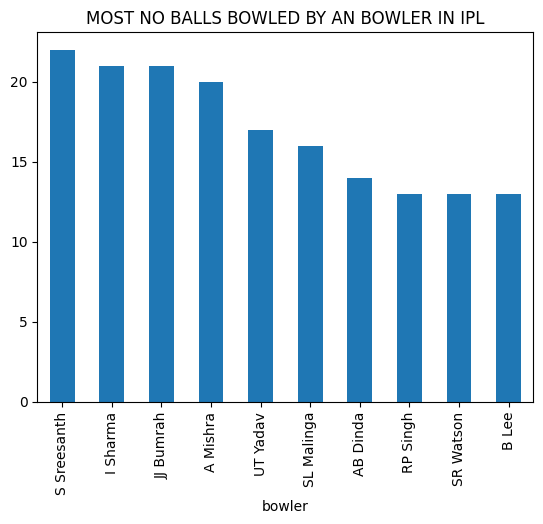

In [ ]:
noballs.groupby('bowler')['noball_runs'].count().sort_values(ascending = False).head(10).plot(kind='bar',title='MOST NO BALLS BOWLED BY AN BOWLER IN IPL')

In [ ]:
# FINDING THE TOP 10 BOWLERS WITH CONCEDING MOST 6's in IPL

In [ ]:
mostsixes = data[data['batsman_runs'] == 6]
mostsixes.groupby('bowler')['batsman_runs'].count().sort_values(ascending = False).head(10)

bowler
PP Chawla          171
A Mishra           170
Harbhajan Singh    142
DJ Bravo           134
RA Jadeja          131
R Ashwin           121
YS Chahal          119
UT Yadav           115
P Kumar            104
R Vinay Kumar       99
Name: batsman_runs, dtype: int64

In [ ]:
# FINDING THE TOP 10 BOWLERS WITH CONCEDING MOST 4's in IPL

In [ ]:
mostfours = data[data['batsman_runs'] == 4]
mostfours.groupby('bowler')['batsman_runs'].count().sort_values(ascending = False).head(10)

bowler
UT Yadav         384
P Kumar          338
B Kumar          323
SL Malinga       316
Z Khan           312
I Sharma         305
PP Chawla        305
R Vinay Kumar    296
IK Pathan        293
SR Watson        293
Name: batsman_runs, dtype: int64

In [ ]:
# FINDING THE TOP 10 BOWLERS WITH CONCEDING MOST WIDES IN IPL

In [ ]:
wide = data[data['wide_runs'] == 1]
wide.groupby('bowler')['batsman_runs'].count().sort_values(ascending = False).head(10)

bowler
SL Malinga     118
DJ Bravo       115
P Kumar        102
SR Watson       92
UT Yadav        92
RP Singh        84
DW Steyn        80
R Ashwin        78
B Kumar         77
DS Kulkarni     70
Name: batsman_runs, dtype: int64

<Axes: title={'center': 'MOST WIDES BY AN BOWLER IN IPL'}, xlabel='bowler'>

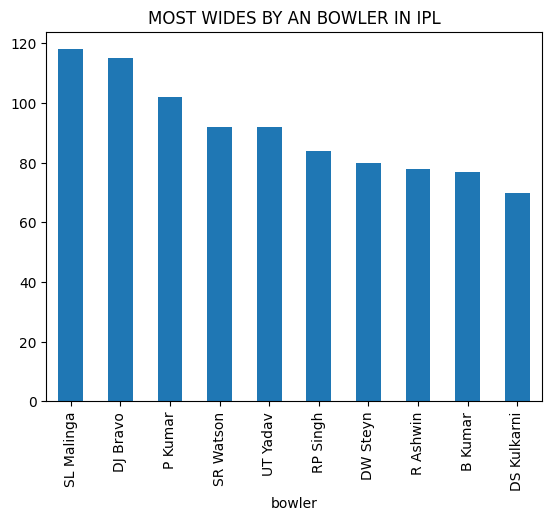

In [ ]:
wide.groupby('bowler')['batsman_runs'].count().sort_values(ascending = False).head(10).plot(kind='bar',title='MOST WIDES BY AN BOWLER IN IPL')

In [ ]:
# FINDING THE TEAMS WITH MOST WIDES

In [ ]:
wide = data[data['wide_runs'] == 1]
wide.groupby('bowling_team')['batsman_runs'].count().sort_values(ascending = False)

bowling_team
Mumbai Indians                 669
Royal Challengers Bangalore    645
Kings XI Punjab                598
Chennai Super Kings            527
Rajasthan Royals               520
Kolkata Knight Riders          513
Delhi Daredevils               505
Sunrisers Hyderabad            293
Deccan Chargers                259
Pune Warriors                   99
Gujarat Lions                   85
Rising Pune Supergiant          58
Kochi Tuskers Kerala            49
Delhi Capitals                  48
Rising Pune Supergiants         47
Name: batsman_runs, dtype: int64

<Axes: title={'center': 'MOST WIDE BALLS BOWLED BY AN TEAM IN IPL'}, xlabel='bowling_team'>

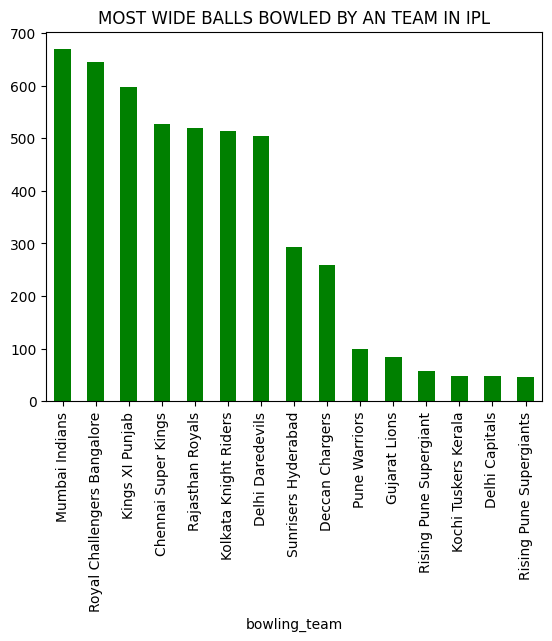

In [ ]:
wide.groupby('bowling_team')['batsman_runs'].count().sort_values(ascending = False).plot(kind='bar',title='MOST WIDE BALLS BOWLED BY AN TEAM IN IPL', color = 'green')

In [ ]:
# FINDING THE TEAMS WITH MOST NO - BALLS

In [ ]:
noballs = data[data['noball_runs'] == 1]
noballs.groupby('bowling_team')['noball_runs'].count().sort_values(ascending = False)

bowling_team
Mumbai Indians                 101
Kings XI Punjab                 93
Royal Challengers Bangalore     90
Delhi Daredevils                84
Kolkata Knight Riders           77
Rajasthan Royals                65
Chennai Super Kings             57
Deccan Chargers                 49
Sunrisers Hyderabad             30
Pune Warriors                   26
Delhi Capitals                   8
Gujarat Lions                    7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          4
Rising Pune Supergiant           1
Name: noball_runs, dtype: int64

In [ ]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [ ]:
#NO OF TIMES EACH TEAM PLAYED SUPER OVER IN IPL

In [ ]:
superover = data[data['is_super_over'] == 1]
superover.groupby('batting_team')['bowling_team'].count().sort_values(ascending = False)

batting_team
Rajasthan Royals               14
Kolkata Knight Riders          13
Royal Challengers Bangalore    12
Kings XI Punjab                11
Gujarat Lions                   8
Sunrisers Hyderabad             7
Delhi Daredevils                6
Chennai Super Kings             5
Mumbai Indians                  5
Name: bowling_team, dtype: int64

<Axes: title={'center': 'MOST SUPER OVER PlaYED TEAMS'}, xlabel='batting_team'>

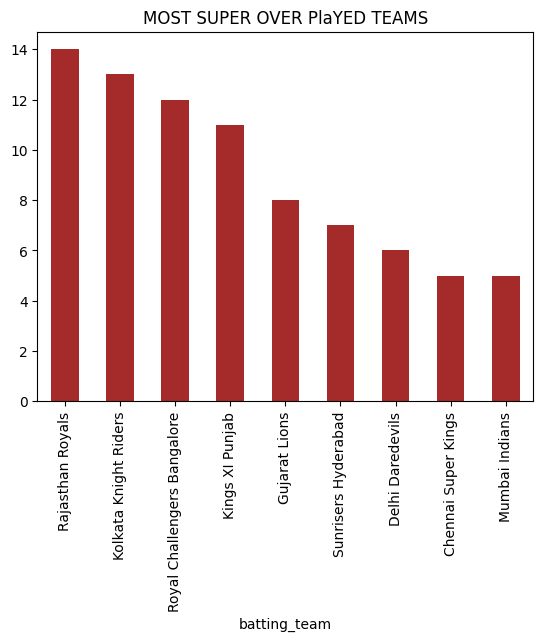

In [ ]:
superover.groupby('batting_team')['bowling_team'].count().sort_values(ascending = False).plot(kind='bar',title='MOST SUPER OVER PlaYED TEAMS',color='brown')

In [ ]:
#HERE WE ARE COUNTING NO OF MATCHES HAPPEND BETWEEN EACH TEAM IT IS LIKE
#HEAD TO HEAD AND CREATING DEFINED FUNCTION FOR IT IF USER ENTERS TO TEAM ITM WILL GIVE OUTPUT AS HOW MANY MATCHES OCCURRED BETWEEN THEM

In [ ]:
result = data[(data['batting_team'] == 'Sunrisers Hyderabad') & (data['bowling_team'] == 'Royal Challengers Bangalore')]
match_counts = result.groupby('match_id')['match_id'].count()
print(match_counts)
count_occurrences = match_counts.value_counts()
print(sum(count_occurrences))

match_id
1        125
388      132
432      125
481      127
503      121
525      111
568       70
580      125
603      124
636      126
7932     126
7944     123
11147    121
11345    123
Name: match_id, dtype: int64
14


In [ ]:
def no_matches_between_each_team(batting_team,bowling_team):
  result = data[(data['batting_team'] == batting_team) & (data['bowling_team'] == bowling_team)]
  match_counts = result.groupby('match_id')['match_id'].count()
  count_occurrences = match_counts.value_counts()
  return (sum(count_occurrences))

In [ ]:
no_matches_between_each_team('Sunrisers Hyderabad','Rajasthan Royals')

11

In [ ]:
data['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
#FINDING THE NUMBER OF MATCHES PLAYED BY EACH PLAYER

In [ ]:
match_count = data[data['batsman'] == 'V Kohli']
match_count = match_count['match_id'].nunique()
print(match_count)

169


**HERE WE CAN SEE THAT VIRAT KOHLI HAS PLAYED 169 MATCHES TILL NOW**

In [ ]:
#HERE WE ARE CREATING A FUNCTION TO SEE NO OF MATCHES AN PLAYER PLAYER BY ENTERING AN INPUT

In [ ]:
def no_of_matches_played(player):
  match_count = data[data['batsman'] == player]
  match_count = match_count['match_id'].nunique()
  return (match_count)

In [ ]:
no_of_matches_played('DA Warner')

126

In [ ]:
no_of_matches_played('Harbhajan Singh')

86

In [ ]:
no_of_matches_played('MS Dhoni')

170


**THE END**